## k-NN and SVM Classification

In [1]:
#add to imports:
from sklearn import metrics, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_predict

#already have these imported:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## don't need when put in final notebook:

In [2]:
#Import cleaned data set - don't need when include in final notebook - already there
Cleaned_data = pd.read_csv("CleanData.csv")

In [3]:
# Only use columns with numbers involved - don't need when include in final notebook - already there
chosen_columns = ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 
                  'failures', 'famrel', 'freetime', 'goout', 'health', 'math', 
                  'port', 'studytime', 'traveltime', 'school_num', 'sex_num','address_num', 
                  'famsize_num', 'Pstatus_num', 'Mjob_num', 'Fjob_num','reason_num', 
                  'guardian_num', 'schoolsup_num', 'famsup_num', 'activities_num','nursery_num', 
                  'higher_num', 'internet_num', 'romantic_num', 'paid_num']

Cleaned_data = Cleaned_data[chosen_columns]

## Using k-NN Classification on the dataset

The data contains alcohol consumption ratings from 1 (very low) to 5 (very high). We will make this a binary variable by considering ratings 1-3 as low consumption and 4-5 as high consumption. This allows us to use classification to try to predict this categorical variable (high or low alcohol consumption) from the other features in the dataset. We will do this for weekend and weekday alcohol consumption separately.

To test accuracy of models, the cross_val_predict function was used, splitting the dataset into 2 for training and testing. Distance was used for weighting the contribution of the nearest neighbors.

In [4]:
# define x and y (binary) variables for classification:

X = Cleaned_data.drop(['Walc','Dalc'], axis=1).as_matrix()

Dalc = Cleaned_data['Dalc'].as_matrix()
yD = Dalc>3 #"high" alcohol consumption = true
Walc = Cleaned_data['Walc'].as_matrix()
yW = Walc>3 #"high" alcohol consumption = true

#For testing a smaller dataset - only increases accuracy of weekend consumption by 2%
# fewer = ['age', 'sex_num','goout','studytime']
# C = Cleaned_data[fewer]
# X = C.as_matrix()

## Weekday alcohol consumption

In [5]:
#finding the best value of k:
n_neighbors = np.array([1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100])

model_accD = np.zeros(n_neighbors.shape)
for ind,k in enumerate(n_neighbors):    
    k_NN_modelD = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    y_predD = cross_val_predict(k_NN_modelD, X, yD, cv=2)
    model_accD[ind] = metrics.accuracy_score(y_true=yD, y_pred=y_predD)
    print(k)
    print(model_accD[ind])
    

1
0.927977839335
5
0.948753462604
10
0.948753462604
15
0.948753462604
20
0.948753462604
25
0.948753462604
30
0.948753462604
35
0.948753462604
40
0.948753462604
45
0.948753462604
50
0.948753462604
100
0.948753462604


[ 0.92797784  0.94875346  0.94875346  0.94875346  0.94875346  0.94875346
  0.94875346  0.94875346  0.94875346  0.94875346  0.94875346  0.94875346]


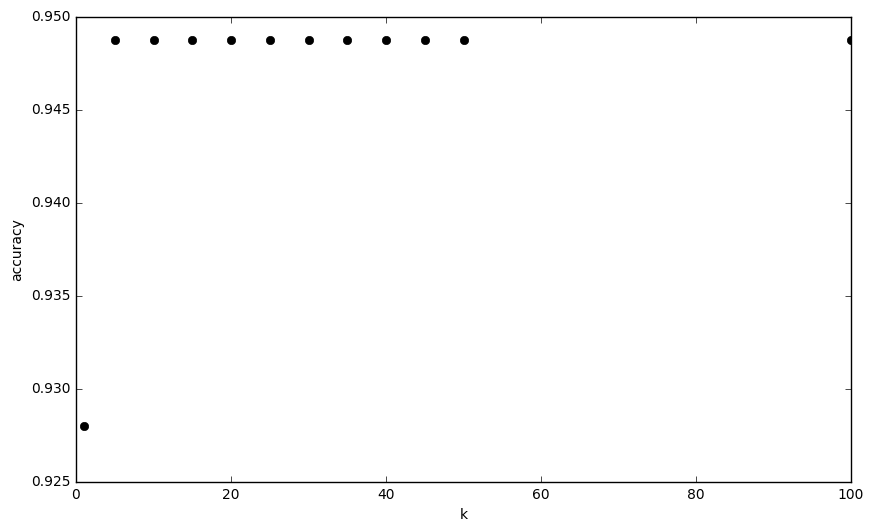

In [6]:
print(model_accD)

plt.plot(n_neighbors, model_accD, 'ko')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

## Weekend alcohol consumption

In [7]:
#finding the best value of k:
model_accW = np.zeros(n_neighbors.shape)
for ind,k in enumerate(n_neighbors):    
    k_NN_modelW = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    y_predW = cross_val_predict(k_NN_modelW, X, yW, cv=2)
    model_accW[ind] = metrics.accuracy_score(y_true=yW, y_pred=y_predW)
    print(k)
    print(model_accW[ind])
    

1
0.747922437673
5
0.765927977839
10
0.778393351801
15
0.778393351801
20
0.792243767313
25
0.792243767313
30
0.792243767313
35
0.788088642659
40
0.789473684211
45
0.789473684211
50
0.789473684211
100
0.789473684211


[ 0.74792244  0.76592798  0.77839335  0.77839335  0.79224377  0.79224377
  0.79224377  0.78808864  0.78947368  0.78947368  0.78947368  0.78947368]


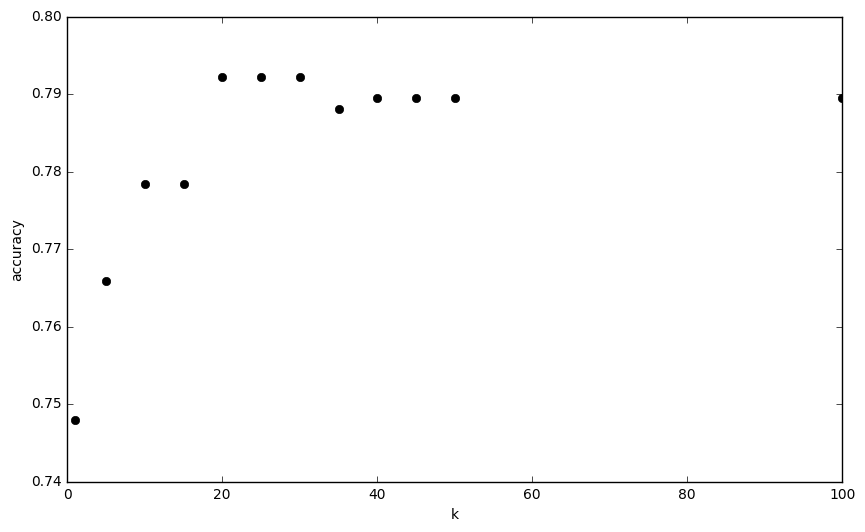

In [8]:
print(model_accW)

plt.plot(n_neighbors, model_accW, 'ko')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

## k-NN Classification Confusion Matrices

In [9]:
print('k-NN (1) Weekday Confusion Matrix:')
k_NN_modelD = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')
k_NN_modelD.fit(X, yD)

y_predD = cross_val_predict(k_NN_modelD, X, yD, cv=2)
print(metrics.confusion_matrix(y_true = yD, y_pred = y_predD))
print('Accuracy = ', metrics.accuracy_score(y_true = yD, y_pred = y_predD))
print('')

print('k-NN (5) Weekday Confusion Matrix:')
k_NN_modelD = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
k_NN_modelD.fit(X, yD)

y_predD = cross_val_predict(k_NN_modelD, X, yD, cv=2)
print(metrics.confusion_matrix(y_true = yD, y_pred = y_predD))
print('Accuracy = ', metrics.accuracy_score(y_true = yD, y_pred = y_predD))
print('')

print('k-NN (10) Weekday Confusion Matrix:')
k_NN_modelD = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')
k_NN_modelD.fit(X, yD)

y_predD = cross_val_predict(k_NN_modelD, X, yD, cv=2)
print(metrics.confusion_matrix(y_true = yD, y_pred = y_predD))
print('Accuracy = ', metrics.accuracy_score(y_true = yD, y_pred = y_predD))
print('')

print('k-NN Weekend Confusion Matrix:')
k_NN_modelW = KNeighborsClassifier(n_neighbors = 25, weights = 'distance')
k_NN_modelW.fit(X, yW)

y_predW = cross_val_predict(k_NN_modelW, X, yW, cv=2)

print(metrics.confusion_matrix(y_true = yW, y_pred = y_predW))
print('Accuracy = ', metrics.accuracy_score(y_true = yW, y_pred = y_predW))

k-NN (1) Weekday Confusion Matrix:
[[669  16]
 [ 36   1]]
Accuracy =  0.927977839335

k-NN (5) Weekday Confusion Matrix:
[[684   1]
 [ 36   1]]
Accuracy =  0.948753462604

k-NN (10) Weekday Confusion Matrix:
[[685   0]
 [ 37   0]]
Accuracy =  0.948753462604

k-NN Weekend Confusion Matrix:
[[567   3]
 [147   5]]
Accuracy =  0.792243767313


## Conclusions for k-NN Classification

We get higher accuracies when predicting high versus low alcohol consumption on weekdays compared to weekends. The value of k chosen for the k-NN model in the case of weekdays does not have an effect on the accuracy of the model for k's greater than or equal to 5. This ends up being true because the model gets the highest accuracy by always predicting low alcohol consumption (or almost always for lower k values), which is the majority of the data used for training. We can see this in the confusion matrix for a k value of 10 which shows the model correctly predicting 685 cases that were low alcohol consumption, and incorrectly predicting 37 to be low consumption. For a k value of 5, the model correctly predicts one rating as high alcohol consumption and incorrectly predicts one high alcohol consumption that is actually low. These model accuracies for predicting level of alcohol consumption on weekdays is 94.9% for k greater than or equal to 5 (which also happens to be the percentage of low alcohol consumption ratings in the dataset used for training the model for weekdays). A k value of 1 actually results in a decently accurate model with accuracy 92.8%, but it only correctly predicts 1 high alcohol consumption. It correctly predicts 669 low alcohol consumptions, but it also incorrectly predicts 16 cases as high consumption. Therefore, a value of 5 for k Nearest Neighbors appears to be the best choice for a model for weekday alcohol consumption.

The best model accuracy for predicting level of alcohol consumption on weekends was 79.2%, achieved for k between (and including) 20 and 30. This is 15.7% less accurate than the model for weekdays, but does more than just assume low alcohol consumption for any input variables. The confusion matrix shows the model correctly predicting high alcohol consumption in 5 cases and correctly predicting low alcohol consumption in 567 cases. This accuracy goes down if we split the data into more groups for cross-validation. Similar results are seen for k between 20 and 30, therefore a value of 25 was picked to represent the best value.

If we only consider the variables age, sex, how often students go out, and time spent on studying, the model accuracy for weekend predictions only increases by 2.2% (79.2% to 81.4%), which is still less than the higest accuracy of predicting consumption on weekdays. The accuracy for weekday predictions actually decreases when the predictive variables are limited. Accuracies also go down if we allow the alcohol consumption rating of '3' to be considered 'high' instead of 'low'.

It appears that while the weekday model is more accurate, the weekend model does a better job at trying to predict high alcohol consumption where there are cases of it instead of just asssuming everything leads to low consumption.

If we include a rating of 3 in the "high" category for predictions, the model accuracies go down, but the confusion matrices show the models doing a better job at trying to predict high alcohol consumption instead of assuming everything to be false. However, due to wording of the survey with 4 and 5 being "high" and "very high", we are going to use the split of 1, 2, and 3 for low alcohol consumption, and 4 and 5 for high alcohol consumption, as was shown in the analyses above.

## Using SVM Classification on the dataset

We will use the same binary variable by considering ratings 1-3 as low consumption and 4-5 as high consumption. This allows us to use classification to try to predict this categorical variable (high or low alcohol consumption) from the other features in the dataset. We will do this for weekend and weekday alcohol consumption separately.

To test accuracy of models, the cross_val_predict function was used, splitting the dataset into 2 for training and testing. The rbf kernel was used.

## Weekday Alcohol Consumption

In [10]:
#finding the best value of C

Cs = np.array([0.001, .1, 1, 10])

model_accDD = np.zeros(Cs.shape)
for ind,C in enumerate(Cs):    
    svm_modelD = svm.SVC(C=C,kernel='rbf')
    y_predDD = cross_val_predict(svm_modelD, X, yD, cv=2)
    model_accDD[ind] = metrics.accuracy_score(y_true=yD, y_pred=y_predDD)
    print(C)
    print(model_accDD[ind])

0.001
0.948753462604
0.1
0.948753462604
1.0
0.948753462604
10.0
0.943213296399


## Weekend Alcohol Consumption

In [11]:
#finding the best value of C

Cs = np.array([2.1, 2.2, 2.3])

model_accWW = np.zeros(Cs.shape)
for ind,C in enumerate(Cs):    
    svm_modelW = svm.SVC(C=C,kernel='rbf')
    y_predWW = cross_val_predict(svm_modelW, X, yW, cv=2)
    model_accWW[ind] = metrics.accuracy_score(y_true=yW, y_pred=y_predWW)
    print(C)
    print(model_accWW[ind])

2.1
0.807479224377
2.2
0.808864265928
2.3
0.807479224377


## SVM Classification Confusion Matrices

In [12]:
print('SVM (C = 1) Weekday Confusion Matrix:')
svm_modelD = svm.SVC(C=1,kernel='rbf')
svm_modelD.fit(X, yD)

y_predDD = cross_val_predict(svm_modelD, X, yD, cv=2)
print(metrics.confusion_matrix(y_true = yD, y_pred = y_predDD))
print('Accuracy = ', metrics.accuracy_score(y_true = yD, y_pred = y_predDD))
print('')
print('SVM (C = 10) Weekday Confusion Matrix:')
svm_modelD = svm.SVC(C=10,kernel='rbf')
svm_modelD.fit(X, yD)

y_predDD = cross_val_predict(svm_modelD, X, yD, cv=2)
print(metrics.confusion_matrix(y_true = yD, y_pred = y_predDD))
print('Accuracy = ', metrics.accuracy_score(y_true = yD, y_pred = y_predDD))

print('')
print('SVM Weekend Confusion Matrix:')
svm_modelW = svm.SVC(C=2.2,kernel='rbf')
svm_modelW.fit(X, yW)

y_predWW = cross_val_predict(svm_modelW, X, yW, cv=2)
print(metrics.confusion_matrix(y_true = yW, y_pred = y_predWW))
print('Accuracy = ', metrics.accuracy_score(y_true = yW, y_pred = y_predWW))

SVM (C = 1) Weekday Confusion Matrix:
[[685   0]
 [ 37   0]]
Accuracy =  0.948753462604

SVM (C = 10) Weekday Confusion Matrix:
[[681   4]
 [ 37   0]]
Accuracy =  0.943213296399

SVM Weekend Confusion Matrix:
[[537  33]
 [105  47]]
Accuracy =  0.808864265928


## Conclusions for SVM Classification


We get higher accuracies when predicting high versus low alcohol consumption on weekdays compared to weekends, same as with k-NN Classification. The value of C chosen for the SVM model in the case of weekdays does not have an effect on the accuracy of the model for C's less than 3.4. This again ends up being true because the model gets the highest accuracy by always predicting low alcohol consumption, which is the majority of the data used for training as explained before. We can see this in the confusion matrix for a C value of 1 which shows the model correctly predicting 685 cases that were low alcohol consumption, and incorrectly predicts 37 to be low consumption. This is the exact result for k-NN classification. However, for a C value of 10, the model tries (and fails) to correctly predict 4 ratings as high alcohol consumption. These model accuracies for predicting level of alcohol consumption on weekdays is 94.9% for C less than 3.4 (which also happens to be the percentage of low alcohol consumption ratings in the dataset used for training the model for weekdays).

The best model accuracy for predicting level of alcohol consumption on weekends was 80.9%, achieved for a C value of 2.2. This is only 14% less accurate than the model for weekdays, but does more than just assume low alcohol consumption for any input variables. The confusion matrix shows the model correctly predicting high alcohol consumption in 47 cases and correctly predicting low alcohol consumption in 537 cases. This accuracy goes down if we split the data into more groups for cross-validation.

Similarly to the results for k_NN classification, it appears that while the weekday model is more accurate (identical to the k_NN model for high k values), the weekend model does a better job at trying to predict high alcohol consumption where there are cases of it instead of just asssuming everyone has low consumption. k_NN and SVM gave the same models of classification for the weekday, and had similar accuracies of around 80% for the weekends.

Similarly to the k-NN Classification, if we include a rating of 3 in the "high" category for predictions, the model accuracies go down, but the confusion matrices show the models doing a better job at trying to predict high alcohol consumption instead of assuming everything to be false. However, due to wording of the survey with 4 and 5 being "high" and "very high", we are going to use the split of 1, 2, and 3 for low alcohol consumption, and 4 and 5 for high alcohol consumption as analyzed above.